## ConnectWise Data Science Interview Project - Pankaj Patel

In [306]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
from IPython.display import display
import json
import requests

In [308]:
#Load the data from the provided source via a web request
mv_data_json = requests.get('https://opendata.arcgis.com/datasets/bdfad82b15344d37beb28d7f90b6c4be_0.geojson')

mv_list_recs = json.loads(mv_data_json.text)
#print(type(mv_list_recs))

In [309]:
#create dataframe
mv_df = pd.DataFrame(mv_list_recs)

In [310]:
mv_df=mv_df.drop(columns='type')

In [311]:
mv_df.head()

,features
0,"{'type': 'Feature', 'properties': {'OBJECTID':..."
1,"{'type': 'Feature', 'properties': {'OBJECTID':..."
2,"{'type': 'Feature', 'properties': {'OBJECTID':..."
3,"{'type': 'Feature', 'properties': {'OBJECTID':..."
4,"{'type': 'Feature', 'properties': {'OBJECTID':..."


In [312]:
print(mv_df['features'][0].keys())

dict_keys(['type', 'properties', 'geometry'])


In [313]:
mv_df['features'][0]['geometry']

{'type': 'Point', 'coordinates': [-78.64833592360367, 35.85409038930386]}

In [314]:
mv_df['features'][0]['properties']

{'OBJECTID': 51520,
 'permittypemapped': 'Building',
 'workclass': 'Addition',
 'permitclass': '434',
 'proposedworkdescription': 'ADDITION',
 'permitclassmapped': 'Residential',
 'applieddate': '2017-10-31T16:57:18.000Z',
 'issueddate': '2017-11-17T20:16:57.000Z',
 'estprojectcost': 33873,
 'constcompletedofficial': 'Yes',
 'censuslanduse': 'ADDITION/ALTERATION RESIDENTIAL BLDG',
 'censuslandusecode': 434,
 'devplanid': 0,
 'corlotid': '0029',
 'cntyacctnum': '0070596',
 'coissueddate': None,
 'cocissueddate': None,
 'cocnbr': None,
 'contractorcompanyname': 'BK. BUILDER',
 'contractordba': None,
 'contractoraddress1': '303 LYNDENBURY',
 'contractoraddress2': None,
 'contractorcity': 'APEX',
 'contractorstate': 'NC',
 'contractoremail': 'bkbuilers98@yahoo.com',
 'contractorlicnum': '4600',
 'contractorphone': '9196693096',
 'contractorzip': '27502',
 'countylocation': 'WAKE',
 'description': 'ADDITION',
 'expirednewpermnum': None,
 'expiresdate': '2019-03-02T05:00:00.000Z',
 'fee': 12

In [315]:
#filtering "properties" dictionary to read data
l1=[]
for i in range(0,len(mv_df)):
            l1.append(mv_df['features'][i]['properties'])
df_l1=pd.DataFrame(l1)

In [316]:
#filtering geometry dictionary to read geographical data (X,Y)
l2=[]
for i in range(0,len(mv_df)):
    try:
        if(mv_df['features'][i]['geometry']['coordinates']!=np.nan):
             l2.append(mv_df['features'][i]['geometry']['coordinates'])
    except TypeError:
        l2.append([0])
df_l2=pd.DataFrame(l2,columns=['X','Y'])

In [317]:
#concatenating to get final dataframe (actual+geographical)
import pandas as pd
df=pd.concat([df_l2,df_l1],axis=1)

In [318]:
len(df.columns)

87

## Exploratory Data Analysis:

1.1 Number of rows and columns in the dataset

In [319]:
#Number of rows and columns in the dataset
df.shape

(149588, 87)

Format is (# rows, # cols), so there are 149588 rows and 87 columns in our dataset

In [320]:
df.head()

,X,Y,CreationDate,Creator,EditDate,Editor,GlobalID,OBJECTID,applieddate,censuslanduse,...,statuscurrentmapped,streetdirectionprefix,streetdirectionsuffix,streetname,streetnum,streettype,totalsqft,voiddate,workclass,workclassmapped
0,-78.648336,35.854090,2018-03-16T01:55:55.663Z,justin.greco@raleighnc.gov_ral,2019-07-19T12:56:25.206Z,,a43650a9-dcc5-4372-8261-ca43fc559fd6,51520,2017-10-31T16:57:18.000Z,ADDITION/ALTERATION RESIDENTIAL BLDG,...,Permit Issued,,,COLLINGSWOOD,5305,DR,0.0,None,Addition,Existing
1,-78.676433,35.880532,2018-03-16T01:55:55.663Z,justin.greco@raleighnc.gov_ral,2019-07-19T12:56:25.206Z,,23682697-2ec5-473b-947d-e22dfc33851b,51521,2017-10-09T16:31:30.000Z,ADDITION/ALTERATION RESIDENTIAL BLDG,...,Permit Issued,,,BOLINGBROOK,2316,LN,0.0,None,Alterations/repairs,Existing
2,-78.715334,35.821738,2018-03-16T01:55:55.663Z,justin.greco@raleighnc.gov_ral,2019-07-19T12:56:25.206Z,,8258a457-b74c-431e-ad01-b711deab9589,51522,2017-10-09T15:28:26.000Z,ADDITION/ALTERATION RESIDENTIAL BLDG,...,Occupancy,,,BELSPRING,3008,LN,0.0,None,Alterations/repairs,Existing
3,-78.661374,35.746488,2018-03-16T01:55:55.663Z,justin.greco@raleighnc.gov_ral,2019-07-19T12:56:25.206Z,,e394e112-183b-416e-bde3-7a7b96dd6d96,51523,2017-06-27T19:30:53.000Z,ADDITION/ALTERATION RESIDENTIAL BLDG,...,Occupancy,None,None,SUFFOLK,1037,BLVD,0.0,None,Alterations/repairs,Existing
4,-78.734347,35.825380,2018-03-16T01:55:55.663Z,justin.greco@raleighnc.gov_ral,2019-07-19T12:56:25.206Z,,90c7bb9d-9800-401b-a68e-beddc47de4e2,51524,2017-06-21T14:43:20.000Z,ADDITION/ALTERATION RESIDENTIAL BLDG,...,Occupancy,,,SARAHCREEK,6004,CT,876.0,None,Other,Existing


In [321]:
#Review the summary statistics for the included features
#The describe() function computes a summary of statistics pertaining to the DataFrame columns
#It gives the mean, std and IQR values summary about numeric columns and excludes the character columns
df.describe()

,X,Y,OBJECTID,censuslandusecode,cocnbr,devplanid,estprojectcost,fee,govtownedprop,housingunitsexist,housingunitstotal,issueddate_mth,issueddate_yr,latitude_perm,longitude_perm,numberstories,parc_open_space_zone_fee,totalsqft
count,149588.000000,149255.000000,149588.000000,142254.000000,2668.000000,129461.000000,1.495880e+05,146371.000000,147868.000000,79187.000000,123880.000000,144814.000000,144814.000000,149255.000000,149255.000000,128541.000000,147869.000000,1.440800e+05
mean,-78.460858,35.835088,122380.575969,325.068047,4614.751874,4712.214381,1.886388e+05,308.594585,0.089857,10.179284,2.716548,6.398221,2009.227948,35.835088,-78.635911,9.575217,2.459643,2.706109e+03
std,3.706689,0.058048,43289.418553,170.523606,3971.971744,4528.609002,1.460298e+06,4327.140889,0.562494,46.478067,200.972725,3.259937,5.738230,0.058048,0.068494,1090.441290,1.183191,2.127835e+04
min,-78.816616,33.956035,47520.000000,100.000000,0.000000,0.000000,0.000000e+00,-21.000000,0.000000,0.000000,0.000000,1.000000,2000.000000,33.956035,-78.816616,0.000000,0.000000,0.000000e+00
25%,-78.680798,35.788266,84916.750000,102.000000,1700.750000,0.000000,8.500000e+03,76.000000,0.000000,0.000000,1.000000,4.000000,2004.000000,35.788266,-78.680916,1.000000,1.000000,1.000000e+02
50%,-78.637152,35.833694,122313.500000,434.000000,3366.000000,5466.000000,5.000000e+04,110.000000,0.000000,1.000000,1.000000,6.000000,2009.000000,35.833694,-78.637310,2.000000,2.000000,1.002000e+03
75%,-78.578333,35.884486,159710.250000,434.000000,6953.250000,7565.000000,1.343520e+05,288.000000,0.000000,1.000000,1.000000,9.000000,2015.000000,35.884486,-78.578819,2.000000,4.000000,2.380000e+03
max,0.000000,35.970246,197912.000000,649.000000,31934.000000,22901.000000,1.700000e+08,757472.000000,5.000000,940.000000,70000.000000,12.000000,2019.000000,35.970246,-78.401195,342365.000000,4.000000,6.627080e+06


In [322]:
#'include' is the argument which is used to pass necessary information regarding what columns
# need to be considered for summarizing. In our case, we have considered object type
df.describe(include=['object'])

,CreationDate,Creator,EditDate,Editor,GlobalID,applieddate,censuslanduse,cntyacctnum,cocissueddate,coissueddate,...,statuscurrent,statuscurrentmapped,streetdirectionprefix,streetdirectionsuffix,streetname,streetnum,streettype,voiddate,workclass,workclassmapped
count,149588,149588,149588,149588,149588,149588,142254,146302,2820,92232,...,149588,149587,136965,136565,149425,149425,143161,6241,149206,149588
unique,366,2,62,2,149588,145375,31,73995,2307,34242,...,18,8,7,6,9288,9526,38,4167,47,2
top,2018-03-16T01:55:55.663Z,justin.greco@raleighnc.gov_ral,2019-07-19T12:56:25.206Z,,bd1213fa-6c33-44a1-8ef1-58e5640b2661,2019-06-06T04:00:00.000Z,ADDITION/ALTERATION RESIDENTIAL BLDG,0055726,2019-08-05T04:00:00.000Z,2009-02-04T12:22:53.000Z,...,INACTIVE (INSPECTIONS COMPLETED),Occupancy,,,GLENWOOD,3000,DR,2015-04-29T14:28:20.000Z,New Building,Existing
freq,137048,137048,144908,144908,1,58,52424,509,10,59,...,123376,123376,124657,132988,2415,660,38219,10,49249,100339


1.2 Total different types of construction :

In [323]:
# Get number of unique values in column 'const_type'
df.const_type.nunique()

18

In [324]:
# count the occurrence of each construction class 
data = df.const_type.value_counts()
data

V  B    91451
VI U    18381
II B    11951
I  B     2719
I  A     2173
IV U     2029
II A     1949
IIIB     1921
V  A     1856
VI P      427
II        385
IV P      367
IIIA      235
V  U      223
I         121
IV        119
V  P       52
III        25
Name: const_type, dtype: int64

Text(0, 0.5, 'Frequency')

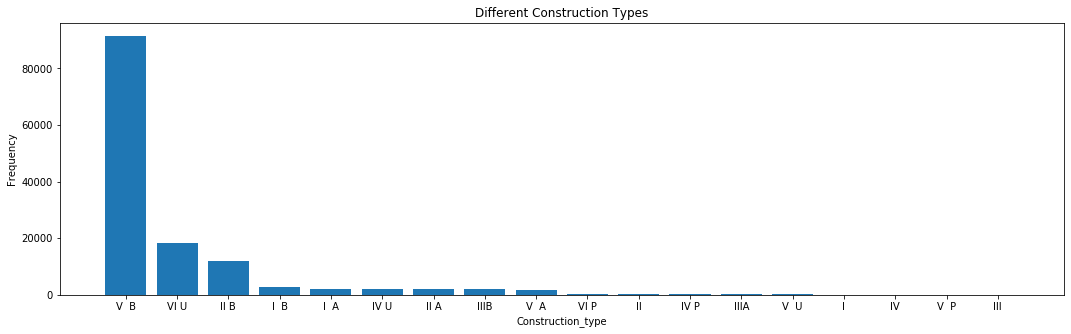

In [325]:
import matplotlib.pyplot as plt
# create a figure and axis 
fig, ax = plt.subplots(figsize=(18,5)) 
# get index and values data 
Construction_type = data.index 
frequency = data.values 
# create bar chart 
ax.bar(Construction_type, frequency) 
# set title and labels 
ax.set_title('Different Construction Types') 
ax.set_xlabel('Construction_type') 
ax.set_ylabel('Frequency')

It can be observed from the Raleigh open dataset that the most used construction type was of type "V B".

In [326]:
#Total different types of construction
df.const_type.unique()

array(['V  B', 'II B', None, 'II A', 'I  A', 'V  A', 'I  B', 'IIIA',
       'IIIB', 'IV', 'IV U', 'I', 'VI U', 'V  U', 'VI P', 'V  P', 'II',
       'IV P', 'III'], dtype=object)

1.3 Mean and median number of stories

In [327]:
#Mean and median number of stories
print("The average number of stories is",df['numberstories'].mean(skipna = True))

The average number of stories is 9.575217245859298


In [328]:
print("The median number of stories is",df['numberstories'].median(skipna = True))

The median number of stories is 2.0


Median of 2 is a value such that a number of stories is equally likely to fall above or below it.

1.4 Standard deviation for the X and Y coordinates of the permits

In [329]:
print("The standard deviation for the X and Y cordinates of the permits are",df['X'].std(skipna = True), "and", df['Y'].std(skipna = True) )

The standard deviation for the X and Y cordinates of the permits are 3.70668918887478 and 0.058048297152903584


From the above values of standard deviations,we can say that the locations are much farther when we look at the horizontal axis (longitude) as compared to the verical axis (latitude) on the Raleigh map.

2. Plot the distributions for each of the following features: Estimated Project
Cost and Issue Date Month.

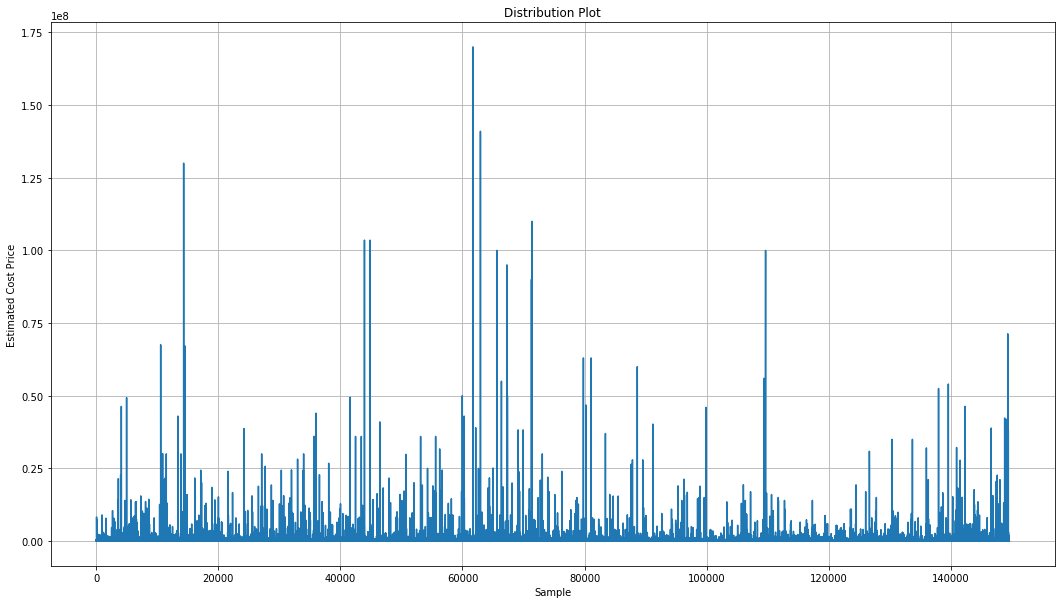

In [333]:
#Distribution Plot for Estimated Cost Price
plt.subplots(figsize=(18,10)) 
plt.plot(df['estprojectcost'])
plt.grid(True)
plt.title("Distribution Plot")
plt.xlabel("Sample")
plt.ylabel("Estimated Cost Price")
plt.show()

It can be observed from above plot distribution that the maximum estimated project cost is $170000000. Also, percentile distribution can be seen below:

In [334]:
df['estprojectcost'].describe()

count    1.495880e+05
mean     1.886388e+05
std      1.460298e+06
min      0.000000e+00
25%      8.500000e+03
50%      5.000000e+04
75%      1.343520e+05
max      1.700000e+08
Name: estprojectcost, dtype: float64

Text(0, 0.5, 'Frequency')

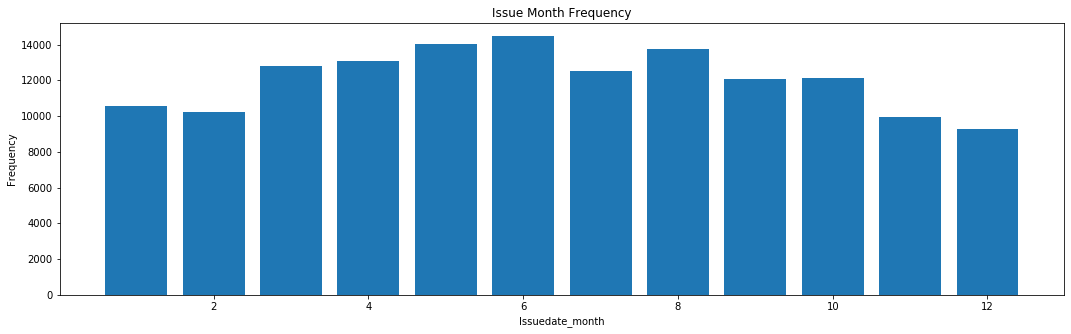

In [335]:
#distribution plot for Issuedate_Month
data = df.issueddate_mth.value_counts()
fig, ax = plt.subplots(figsize=(18,5)) 
# get x and y data 
Issuedate_month = data.index 
frequency = data.values 
# create bar chart 
ax.bar(Issuedate_month, frequency) 
# set title and labels 
ax.set_title('Issue Month Frequency') 
ax.set_xlabel('Issuedate_month') 
ax.set_ylabel('Frequency')

From the above graph,it can be observed that the maximum number of pending/granted permits was carried out in the month of June(6th) across all the years.

#### A hypothetical executive team is interested in the behavior between Permit IssueYear and Estimated Project Cost, but only for the "New" construction work class,with a construction type of "V B", and with less than 3 stories. Perform a simpleregression analysis of this relationship and describe what insights we can gleam from this using success metrics. (Hint: Implement handling for missing values and explain your reasoning.)

Creating a subset of the dataframe(df_final) with only the specified conditions

In [336]:
df_new = df[((df["workclass"]=='New Building') | (df["workclass"]=='NEW BUILDING') | (df["workclass"]=='New Building')) & 
           (df["const_type"]=='V  B') & (df['numberstories']<3)] 

In [337]:
df_final=df_new[['issueddate_yr','estprojectcost']]

In [338]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31161 entries, 9 to 148358
Data columns (total 2 columns):
issueddate_yr     31043 non-null float64
estprojectcost    31161 non-null float64
dtypes: float64(2)
memory usage: 730.3 KB


In [339]:
# Handling missing data
df_final.isnull().sum().sort_values(ascending=False).head()

issueddate_yr     118
estprojectcost      0
dtype: int64

#### Filling the mssing values with 9999. This was the best approach since if it was replaced by mean or median ,then that would be a fake data since it would mean that the year values existed even for the pending building permits

In [340]:
df_final['issueddate_yr'].fillna(9999, inplace=True)

In [341]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31161 entries, 9 to 148358
Data columns (total 2 columns):
issueddate_yr     31161 non-null float64
estprojectcost    31161 non-null float64
dtypes: float64(2)
memory usage: 730.3 KB


In [342]:
df_final = df_final[['issueddate_yr','estprojectcost']].astype(int)
df_final.head()

,issueddate_yr,estprojectcost
9,2017,338717
17,2017,244174
18,2017,584338
23,2017,391574
27,2017,125837


#### Plotting the relationship between Estimated Project Cost and Issue Date Month as required by the executive team

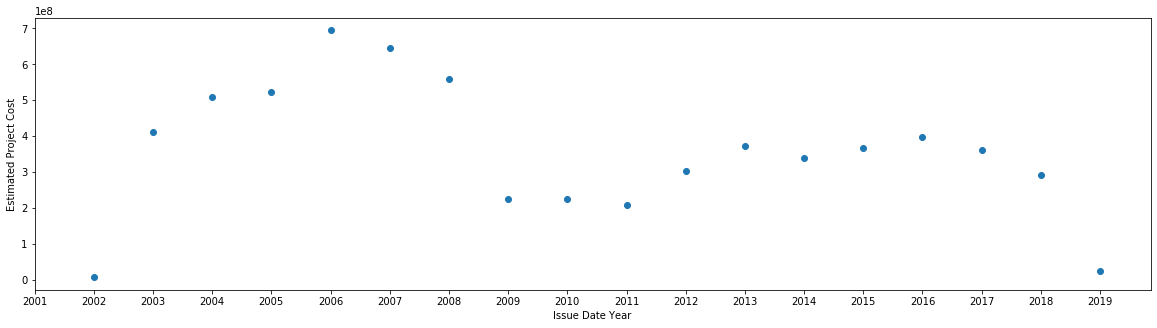

In [343]:
import seaborn as sns
import matplotlib.pyplot as plt
df_final.drop(df_final.loc[df_final['issueddate_yr']==9999].index, inplace=True)
estprojectcost_sum=df_final.groupby('issueddate_yr')['estprojectcost'].sum()
plt.subplots(figsize=(20,5)) 
plt.scatter(estprojectcost_sum.index,estprojectcost_sum)
plt.xticks(np.arange(2001,2020,1))
plt.xlabel("Issue Date Year")
plt.ylabel("Estimated Project Cost")
plt.show()

From the above scatter plot,it can be observed that the total estimated project cost for the the "New" construction work class,
with a construction type of "V B" and and with less than 3 stories was seen in the year 2006.

## Now performing a regression analysis
#### Lets try to do regression analysis for sum of estimated project cost for each year.


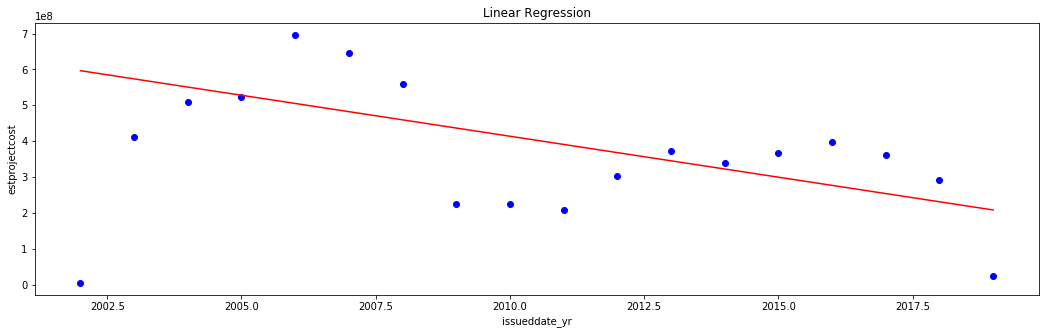

In [344]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lin = LinearRegression()
x = estprojectcost_sum.index.values
y = estprojectcost_sum.values

x =x.reshape(-1,1)
y=y.reshape(-1,1)

#Split the dataset into the training set and test set
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size =0.2,random_state = 42)
lin.fit(xTrain,yTrain)

plt.subplots(figsize=(18,5))
plt.scatter(x,y,color= 'blue')
plt.plot(x,lin.predict(x),color='red')
plt.title('Linear Regression') 
plt.xlabel('issueddate_yr') 
plt.ylabel('estprojectcost') 
  
plt.show()

#### Trying polynomial

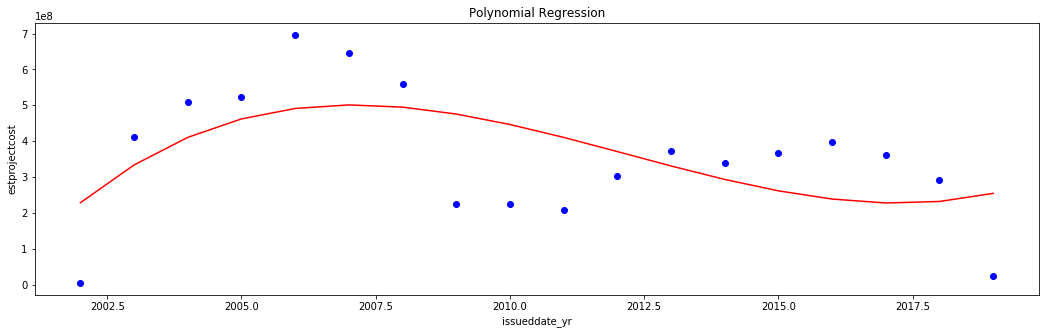

In [345]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
x_poly = poly.fit_transform(x) 
  
poly.fit(x_poly, y) 
lin2 = LinearRegression() 
lin2.fit(x_poly, y) 

# Visualising the Polynomial Regression results 
plt.subplots(figsize=(18,5))
plt.scatter(x, y, color = 'blue') 
plt.plot(x, lin2.predict(poly.fit_transform(x)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('issueddate_yr') 
plt.ylabel('estprojectcost') 
  
plt.show()

#### q-q plot for Normality

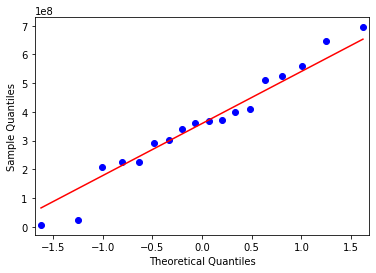

In [346]:
from statsmodels.graphics.gofplots import qqplot
qqplot(estprojectcost_sum, line='s')
plt.show()

In [347]:
#Shapiro-Wilk test
from scipy.stats import shapiro
# normality test
stat, p = shapiro(estprojectcost_sum)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.970, p=0.797


### Success Metrics

In [348]:
#For sum of estimated cost per year using polynomial regression
import scipy.stats as stats
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
r2score = r2_score(yTest,lin2.predict(poly.fit_transform(xTest)))
mae = metrics.mean_absolute_error(yTest,lin2.predict(poly.fit_transform(xTest)))
mse= metrics.mean_squared_error(yTest,lin2.predict(poly.fit_transform(xTest)))
rmse=round(mse,4)
explainedvar= metrics.explained_variance_score(yTest,lin2.predict(poly.fit_transform(xTest)))

print('Metrics for Polynomial for the sum of estimated of cost for each year\n')
print('Intercept :',lin2.intercept_ ,'Coefficient :', lin2.coef_)
print("R2Score :",r2score)
print("MAE :",mae)
print("MSE :",mse)
print("RMSE :",rmse)
print("Explained Variance :",explainedvar)

#Summary Statistics
from statsmodels.api import OLS
OLS(x,y).fit().summary()


Metrics for Polynomial for the sum of estimated of cost for each year

Intercept : [-1.06051803e+15] Coefficient : [[ 0.00000000e+00  1.24575357e+06  1.57164729e+09 -1.04143667e+06
   1.94088731e+02]]
R2Score : 0.43480917249584794
MAE : 166308575.75
MSE : 3.1281625784383e+16
RMSE : 3.1281625784383e+16
Explained Variance : 0.4902499731711101


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.797
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              66.60
Date:                Sun, 06 Oct 2019   Prob (F-statistic):                    2.78e-07
Time:                        22:31:09   Log-Likelihood:                         -148.12
No. Observations:                  18   AIC:                                      298.2
Df Residuals:                      17   BIC:                                      299.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4.457e-06   5.46e-07      8.161      0.000     3.3e-06    5.61e-06
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.140
Skew:                           0.112   Prob(JB):                        0.932
Kurtosis:                       2.630   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>INFERENCES:</br>
<br>1.This model can explain 43% (r2score) variation in the estimated project cost.</br>
<br>2.From the plot,we can clearly observe that data is not linear data.Hence, it does not confirm linearity assumptions of regression analysis.</br>
<br>3.Shapiro-wilk test and qq plot shows that the data looks like it is drawn from a gaussian distribution.</br>

### Now lets try to do regression analysis for all the data points of the subset data.

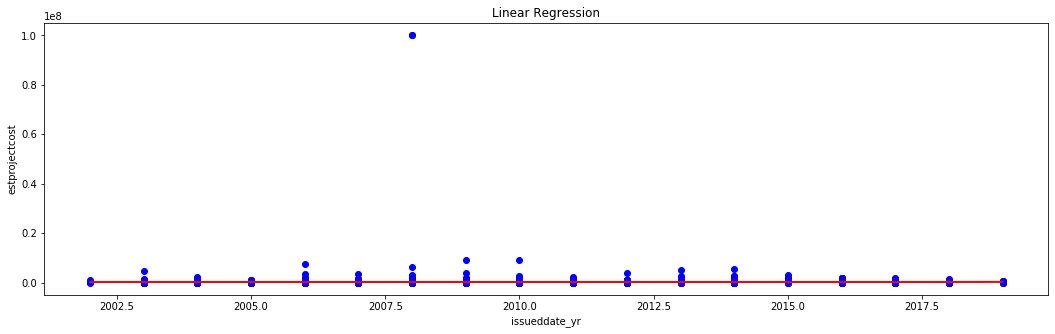

In [349]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lin = LinearRegression()
x = df_final.iloc[:,0].values
y = df_final.iloc[:, 1].values

x =x.reshape(-1,1)
y=y.reshape(-1,1)

#Split the dataset into the training set and test set
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size =0.2,random_state = 42)
lin.fit(xTrain,yTrain)

# Visualising the Linear Regression results 
plt.subplots(figsize=(18,5))
plt.scatter(xTrain,yTrain,color= 'blue')
plt.plot(xTest,lin.predict(xTest),color='red')
plt.title('Linear Regression') 
plt.xlabel('issueddate_yr') 
plt.ylabel('estprojectcost') 
  
plt.show()

#### q-q plot for Normality

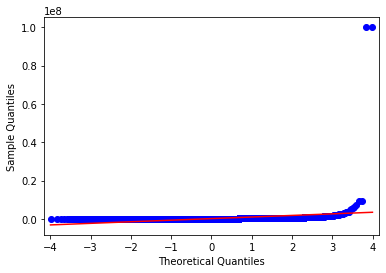

In [350]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df_final['estprojectcost'], line='s')
plt.show()

In [351]:
#Shapiro-Wilk test
from scipy.stats import shapiro
stat, p = shapiro(df_final['estprojectcost']) #estprojectcost_sum)
# normality test
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.043, p=0.000


### Success Metrics

In [352]:
#For all data points
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
r2score = r2_score(yTest,lin.predict(xTest))
mae = metrics.mean_absolute_error(yTest,lin.predict(xTest))
mse= metrics.mean_squared_error(yTest,lin.predict(xTest))
rmse=round(mse,4)
explainedvar= metrics.explained_variance_score(yTest,lin.predict(xTest))

print('Metrics for all the data points taken individually for each year\n')
print('Intercept :',lin.intercept_ ,'Coefficient :', lin.coef_)
print("R2Score :",r2score)
print("MAE :",mae)
print("MSE :",mse)
print("RMSE :",rmse)
print("Explained Variance :",explainedvar)

#Summary Statistics
from statsmodels.api import OLS
OLS(x,y).fit().summary()

Metrics for all the data points taken individually for each year

Intercept : [-23656927.48449863] Coefficient : [[11883.56385887]]
R2Score : 0.11537590824615251
MAE : 98414.33896328474
MSE : 25927991621.781193
RMSE : 25927991621.7812
Explained Variance : 0.11836683929199976


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.060
Model:                            OLS   Adj. R-squared (uncentered):              0.060
Method:                 Least Squares   F-statistic:                              1983.
Date:                Sun, 06 Oct 2019   Prob (F-statistic):                        0.00
Time:                        22:31:18   Log-Likelihood:                     -2.7917e+05
No. Observations:               31043   AIC:                                  5.583e+05
Df Residuals:                   31042   BIC:                                  5.584e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0006    1.3e-05     44.533      0.000       0.001       0.001
==============================================================================
Omnibus:                   128524.316   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     246700111039.859
Skew:                        -114.314   Prob(JB):                         0.00
Kurtosis:                   13811.577   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>INFERENCES :</br>
<br>1.This model can explain 11 percent (r2score) variation in the estimated project cost.
    Hence,above model (regression analysis for sum of estimated project cost for each year) is better in terms of explaining estimated project cost.</br>
<br>2.From the above plot,we can clearly observe that data is not linear.Hence, it does not confirm linearity assumptions of regression analysis.</br>
<br>3.Shapiro-wilk test and qq plot shows that the data looks like it is not drawn from a gaussian distribution.</br>

### Time Series Analysis

In [353]:
df_Reg =pd.DataFrame(estprojectcost_sum)

In [354]:
X=df_Reg['estprojectcost'].values
train = X[0:13]
test = X[13:]
train.size,test.size

(13, 5)

In [355]:
#creating combinations of orders for AR model,Differencing and MA model
import itertools
p=d=q=range(0,3)
pdq = list(itertools.product(p,d,q))
len(pdq)

27

In [356]:
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
        
    except:
        continue

(0, 0, 0) 536.3741590022829
(0, 0, 1) 533.575050201401
(0, 0, 2) 533.3500264677401
(0, 1, 0) 492.312351177909
(0, 1, 1) 493.6039974970547
(0, 1, 2) 495.21971160958844
(0, 2, 0) 453.36914778826565
(0, 2, 1) 454.3573333283949
(0, 2, 2) 456.3572869014493
(1, 0, 0) 533.705809915173
(1, 1, 0) 493.4111733120171
(1, 1, 1) 495.40181346665577
(1, 1, 2) 496.1611042323676
(1, 2, 0) 454.36769373862336
(1, 2, 1) 455.9307029875813
(1, 2, 2) 458.2937509132739
(2, 0, 0) 533.5700834763526
(2, 0, 1) 531.1885069722437
(2, 0, 2) 537.3114379913764
(2, 1, 0) 495.39258365093247
(2, 1, 1) 497.9227778486676
(2, 1, 2) 497.92930975641434
(2, 2, 0) 456.3676915326817
(2, 2, 1) 458.21478082158796


In [357]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
model_arima = ARIMA(train,order=(1, 0, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

533.705809915173


In [358]:
print(model_arima_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   13
Model:                     ARMA(1, 0)   Log Likelihood                -263.853
Method:                       css-mle   S.D. of innovations      154979982.054
Date:                Sun, 06 Oct 2019   AIC                            533.706
Time:                        22:31:30   BIC                            535.401
Sample:                             0   HQIC                           533.357
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.866e+08   1.03e+08      3.757      0.003    1.85e+08    5.88e+08
ar.L1.y        0.6196      0.246      2.523      0.028       0.138       1.101
                                    Roots           

In [359]:
predictions= model_arima_fit.forecast(steps=5)[0]
predictions


Comparison=pd.DataFrame({"test_values":test,"pred_values":predictions})
Comparison['%Error']=((Comparison['test_values']-Comparison['pred_values'])/Comparison['test_values'])*100
Comparison

,test_values,pred_values,%Error
0,368503278,3.570929e+08,3.096422
1,398055981,3.683074e+08,7.473477
2,362111961,3.752563e+08,-3.629922
3,291240065,3.795622e+08,-30.326241
4,25510402,3.822303e+08,-1398.331300


In [360]:
mean_squared_error(test,predictions)

2.7247573993984956e+16

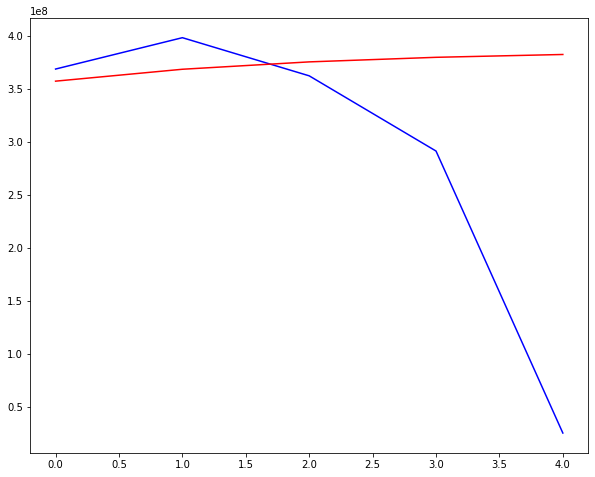

In [361]:
plt.subplots(figsize=(10,8))
plt.plot(test,color='blue')
plt.plot(predictions,color='red')

<br>1.In the above section,I tried using the ARIMA model in order to implement time series forecasting.</br>
<br>2.We have only 18 data points (since we are trying to understand the relationship between issue date year and estimated project cost) which is insufficient to understand this relationship in terms of time series.</br>
<br>3.I tried selecting the model orders with the lower AIC values, however, I observed it was giving negative predictions for the model.</br>
<br>4.The nearest best fit we got was with orders 1,0,0 as displayed above, which gave us nearly good predictions and low % errors.</br>
<br>5.Hence for implementing time series on this data we would require more samples</br>


# Suggestions-Additional techniques or methodologies

<br>1.On further scrutiny,I found that the correlation between estimated project cost (target variable) and fee,total square foot (variables) looks significant.Including them in my analysis could have led to better results.
The correlation plot can be observed below.</br>
<br>2.In order to improve this analysis, we need to check for LINE assumptions (Linearity,Independence,Normality,Equality of Variance).If we are failing in these assumptions,then GLM (Generalized Linear Model) could be a better option.</br>
<br>3.If we consider working further with time series forecasting, we require more data in order to build a robust model.Hence, we can use the Issueddate and MonthIssued columns for predicting estimated project cost on daily/ monthly basis.</br>

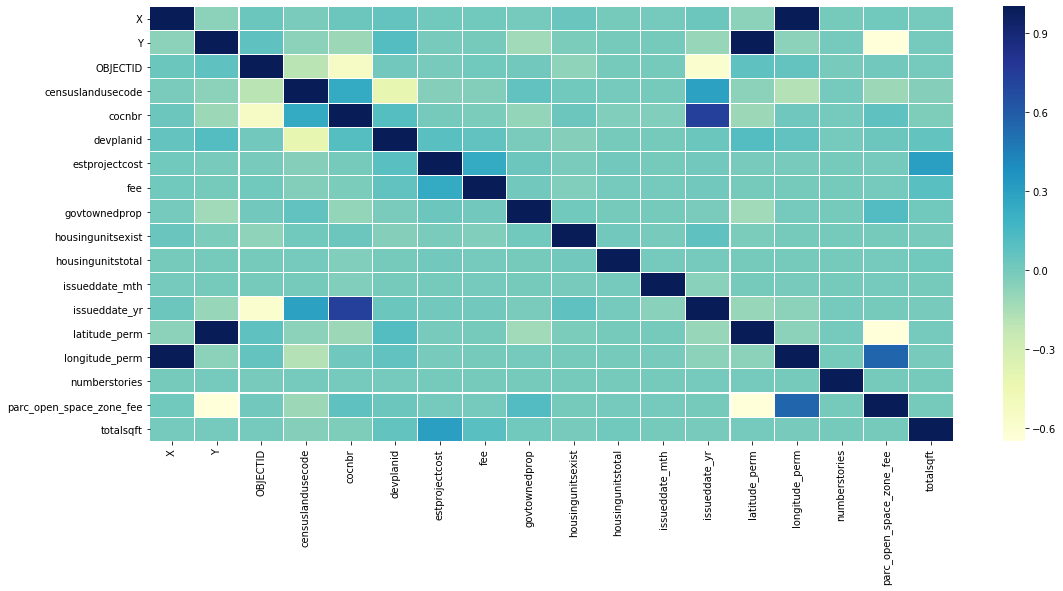

In [362]:
corrmat = df.corr() 
f, ax = plt.subplots(figsize =(18, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 